In [3]:
# !pipx install -U torch sahi ultralytics

!pip install -U torch sahi ultralytics


  Using cached sahi-0.11.18-py3-none-any.whl.metadata (17 kB)
  Using cached ultralytics-8.2.60-py3-none-any.whl.metadata (41 kB)
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.0-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached pybboxes-0.1.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached fire-0.6.0.tar.gz (88 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached terminaltables-3.1.10-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━

In [4]:
import os

In [5]:
from sahi.utils.yolov8 import (
    download_yolov8s_model
)

from sahi import AutoDetectionModel
import torch
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.predict import visualize_object_predictions
from IPython.display import Image
from numpy import asarray
from ultralytics import YOLO


In [6]:
yolov8_model_path = "model/bestModel.pt"
download_yolov8s_model(yolov8_model_path)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [8]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.2,
    device=device, # or 'cuda:0'
)

In [24]:
# import cv2
# from matplotlib import pyplot as plt

# # Load an image
image_path = 'images_waldo/waldo_26.jpg'
# image = cv2.imread(image_path)

# # Perform detection
# results = model(image)

# # Plot the results
# annotated_image = results[0].plot()
# plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
# plt.show()


In [25]:
result = get_prediction(image_path, detection_model)

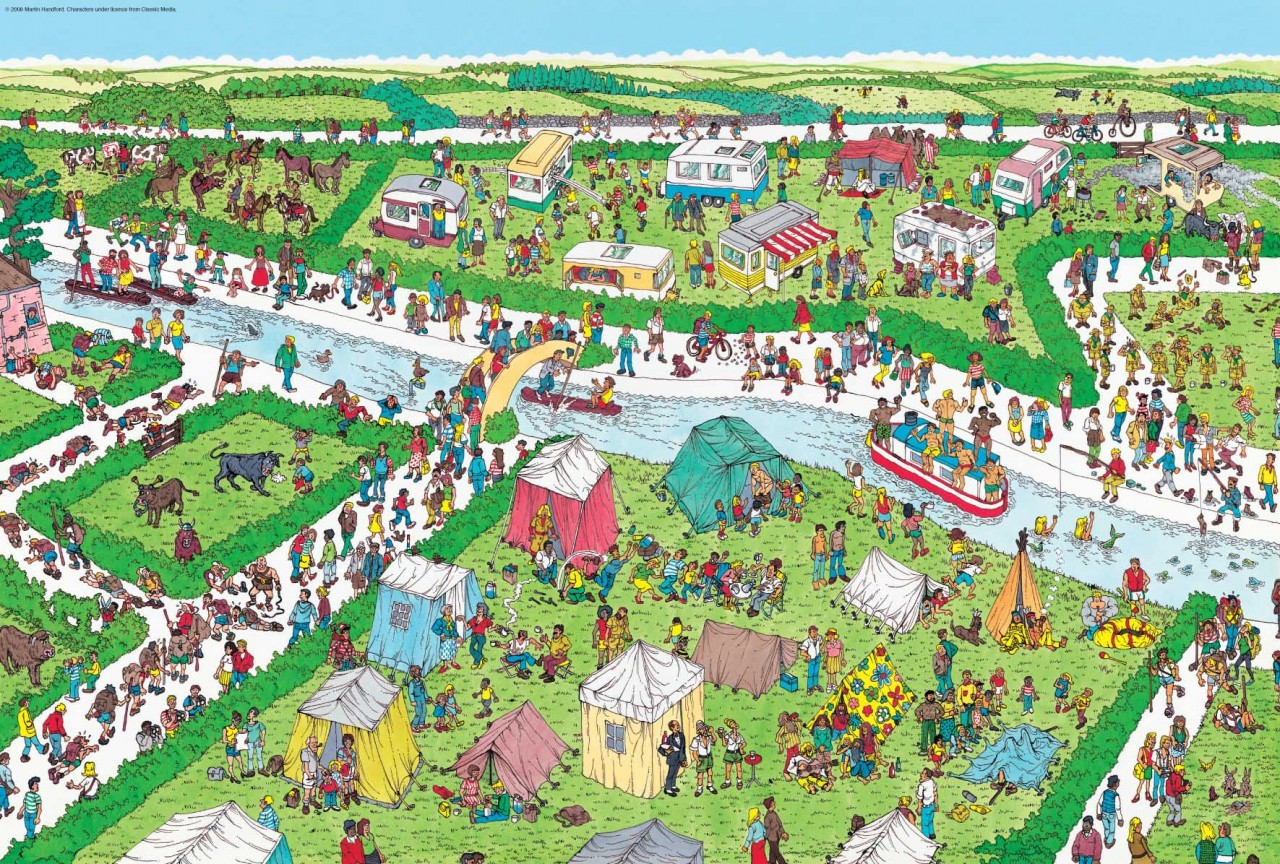

In [26]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [27]:
result = get_sliced_prediction(
    image_path,
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 24 slices.


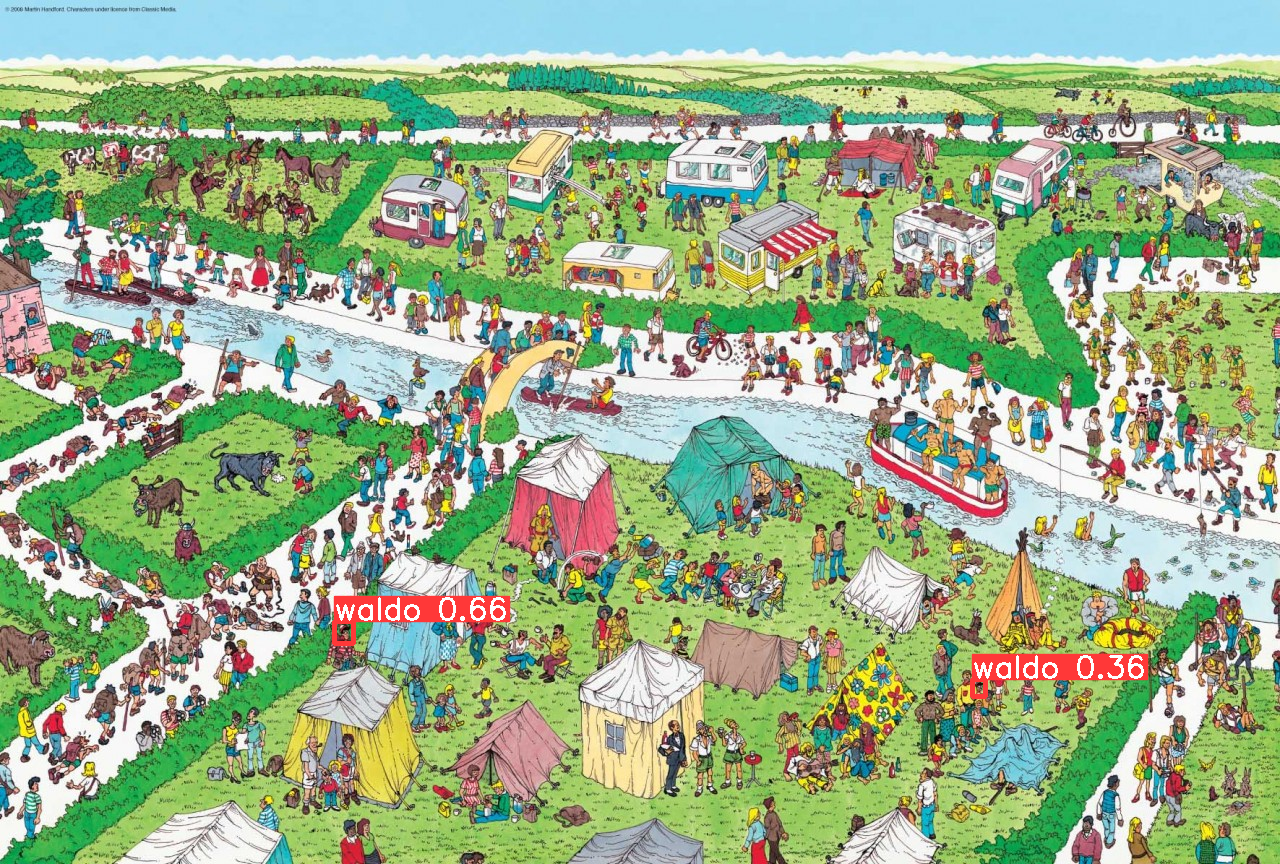

In [28]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")